Preguntas:
- Se debe normalizar?
- country se deberia volver numerico?
- reserved_room_type, assigned_room_type (fusionar)
- codificar categoricas con one hot o label?
- eliminar columna company


# Reto 1

## Pre-procesamiento de Datos:

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform




In [12]:
file_name = 'datasets/hotel_bookings.csv'
df = pd.read_csv(file_name)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [13]:
df.shape

(119390, 32)

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


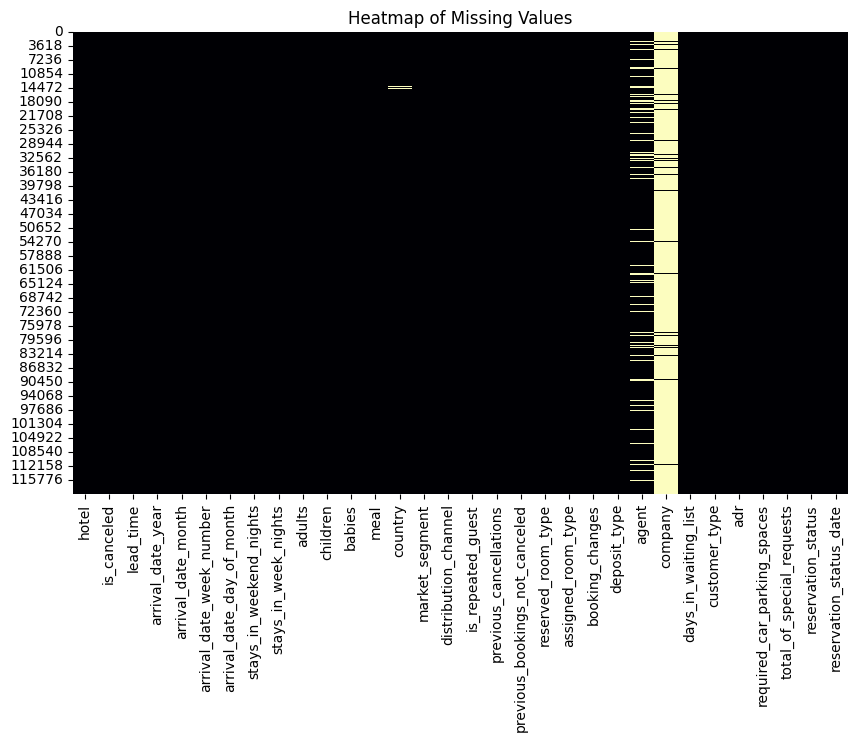

In [15]:
# Create a boolean mask where True indicates NaN values
null_mask = df.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(null_mask, cbar=False, cmap="magma")
plt.title("Heatmap of Missing Values")
plt.show()

In [16]:
# Calculate the number of missing values
missing_counts = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = df.isnull().mean() * 100

# Create a DataFrame to hold both counts and percentages
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage': missing_percentage
})

# Filter to show only columns with more than 1% missing values
missing_summary_filtered = missing_summary[missing_summary['Percentage'] > 0]

# Calculate totals
total_missing = missing_summary['Missing Values'].sum()
total_percentage = 0

# Add totals to the filtered summary
missing_summary_filtered.loc['Total'] = [total_missing,0]

# Print the summary table
print(missing_summary_filtered)


          Missing Values  Percentage
children               4    0.003350
country              488    0.408744
agent              16340   13.686238
company           112593   94.306893
Total             129425    0.000000


C:\Users\mey\AppData\Local\Temp\ipykernel_15880\3588148369.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_summary_filtered.loc['Total'] = [total_missing,0]


En el mapa de calor se puede evidenciar que las columnas agent y company estan relacionadas. Pues las filas que tienen un valor para agent no tienen un valor para company y viceversa. 

In [17]:
# Filter rows where agent has a value and company has no value
subset = df[(df['agent'].notnull()) & (df['company'].isnull())]
print(f"Number of rows where agent has a value and company has no value: {len(subset)}")

# Filter rows where agent has no value and company has a value
subset2 = df[(df['agent'].isnull()) & (df['company'].notnull())]
print(f"Number of rows where agent has no value and company has a value: {len(subset2)}")

# Filter rows where agent has value and company also has value
subset3 = df[(df['agent'].notnull()) & (df['company'].notnull())]
print(f"Number of rows where agent has value and company also has value: {len(subset3)}")

# Filter rows where agent has no value and company also has no value
subset4 = df[(df['agent'].isnull()) & (df['company'].isnull())]
print(f"Number of rows where agent has no value and company also has no value: {len(subset4)}")




Number of rows where agent has a value and company has no value: 102833
Number of rows where agent has no value and company has a value: 6580
Number of rows where agent has value and company also has value: 217
Number of rows where agent has no value and company also has no value: 9760


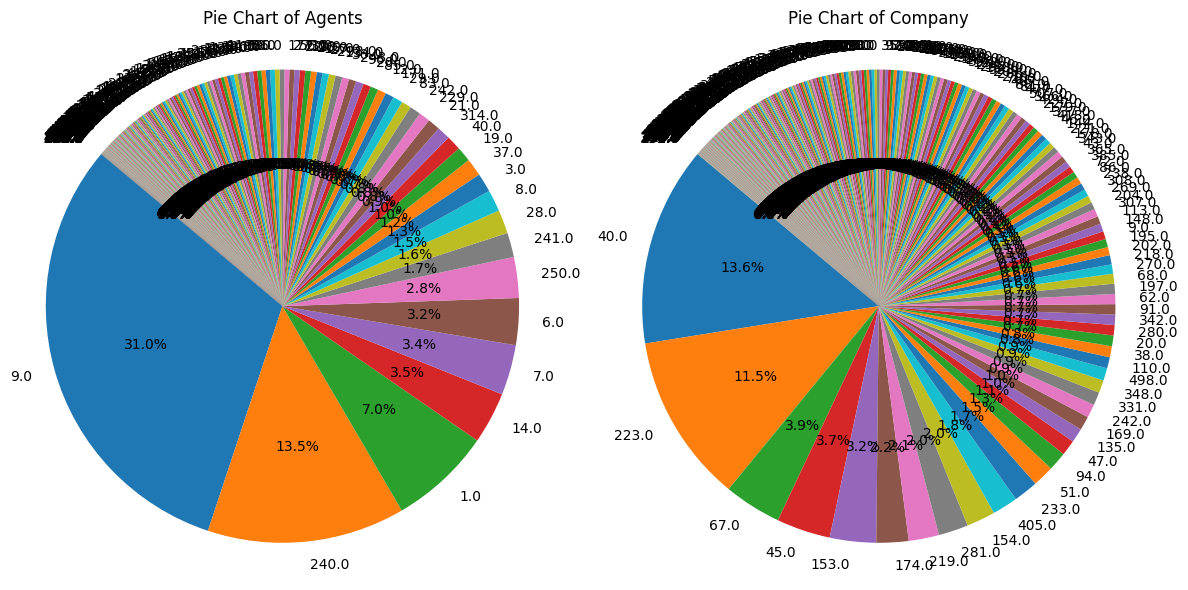

In [18]:
agent_counts = df['agent'].value_counts()

# Create a figure with a 1x2 grid for the pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First pie chart
axs[0].pie(agent_counts, labels=agent_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Pie Chart of Agents')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# second pie chart
company_counts = df['company'].value_counts()  # Example for second chart
axs[1].pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Pie Chart of Company')
axs[1].axis('equal')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [19]:


def create_custom_pie_chart(df, column, threshold=5, colormap='GnBu', title='Pie Chart',):

    # Calculate total occurrences
    counts = df[column].value_counts()
    total = counts.sum()

    # Calculate percentage for each country
    percentages = (counts / total) * 100

    # Identify countries with less than the specified threshold and sum their percentages
    small_labels = percentages[percentages < threshold]
    other_percentage = small_labels.sum()

    # Filter out the countries with >= the specified threshold and add the 'Others' category
    percentages = percentages[percentages >= threshold]
    percentages['Others'] = other_percentage

    # Create a color map from the specified colormap
    cmap = plt.get_cmap(colormap)
    colors = cmap(np.linspace(0.2, 0.8, len(percentages)))

    # Create the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(percentages,
            labels=percentages.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=colors,
            shadow=True,
            wedgeprops={'edgecolor': 'black'})

    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
    plt.tight_layout()
    plt.show()



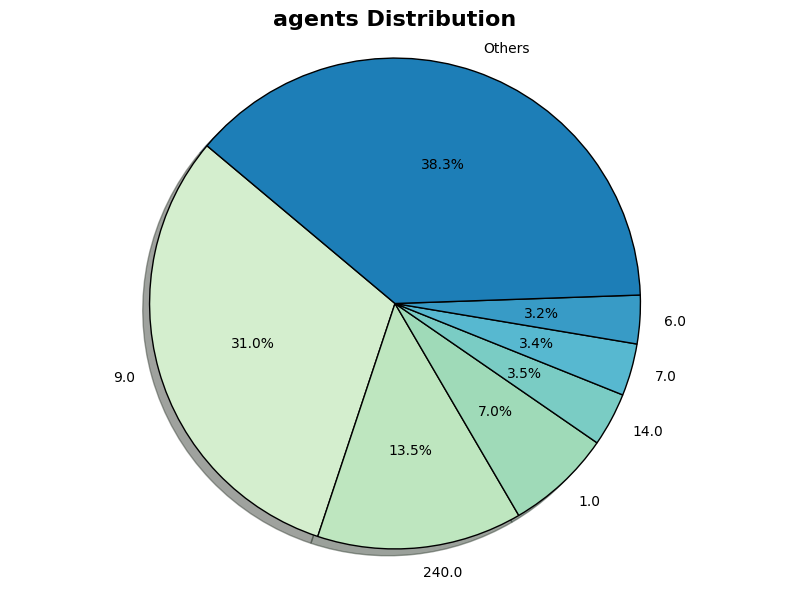

In [20]:
create_custom_pie_chart(df, column='agent', threshold=3, colormap='GnBu', title='agents Distribution')


## Imputación de datos Faltantes

In [21]:
df = df.drop('company', axis=1)

In [22]:
missing_numeric = ['children']
missing_categorical = ['country',"agent"]

# Step 2: Impute median for numeric columns
median_imputer = SimpleImputer(strategy='median')
df[missing_numeric] = median_imputer.fit_transform(df[missing_numeric])

In [23]:
# Step 3: Impute mode for categorical columns
mode_imputer = SimpleImputer(strategy='most_frequent')
df[missing_categorical] = mode_imputer.fit_transform(df[missing_categorical])

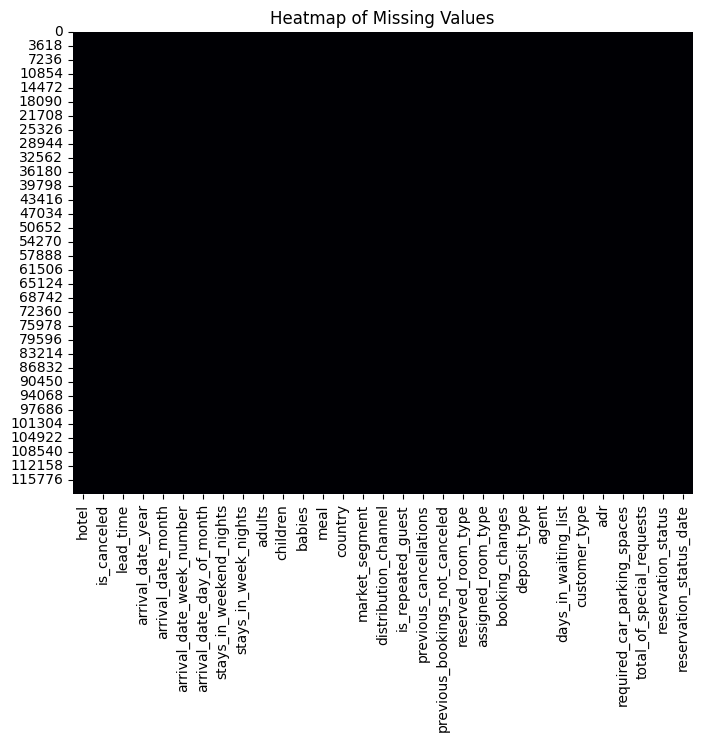

In [24]:
# Create a boolean mask where True indicates NaN values
null_mask = df.isnull()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(null_mask, cbar=False, cmap="magma")
plt.title("Heatmap of Missing Values")
plt.show()

### Identificar Atípicos:

#### Rango Intercuartil:

                           Columna  Datos Atípicos
0                        lead_time            3005
1          stays_in_weekend_nights             265
2             stays_in_week_nights            3354
3                           adults           29710
4                         children            8590
5                           babies             917
6           previous_cancellations            6484
7   previous_bookings_not_canceled            3620
8                  booking_changes           18076
9             days_in_waiting_list            3698
10                             adr            3793
11     required_car_parking_spaces            7416


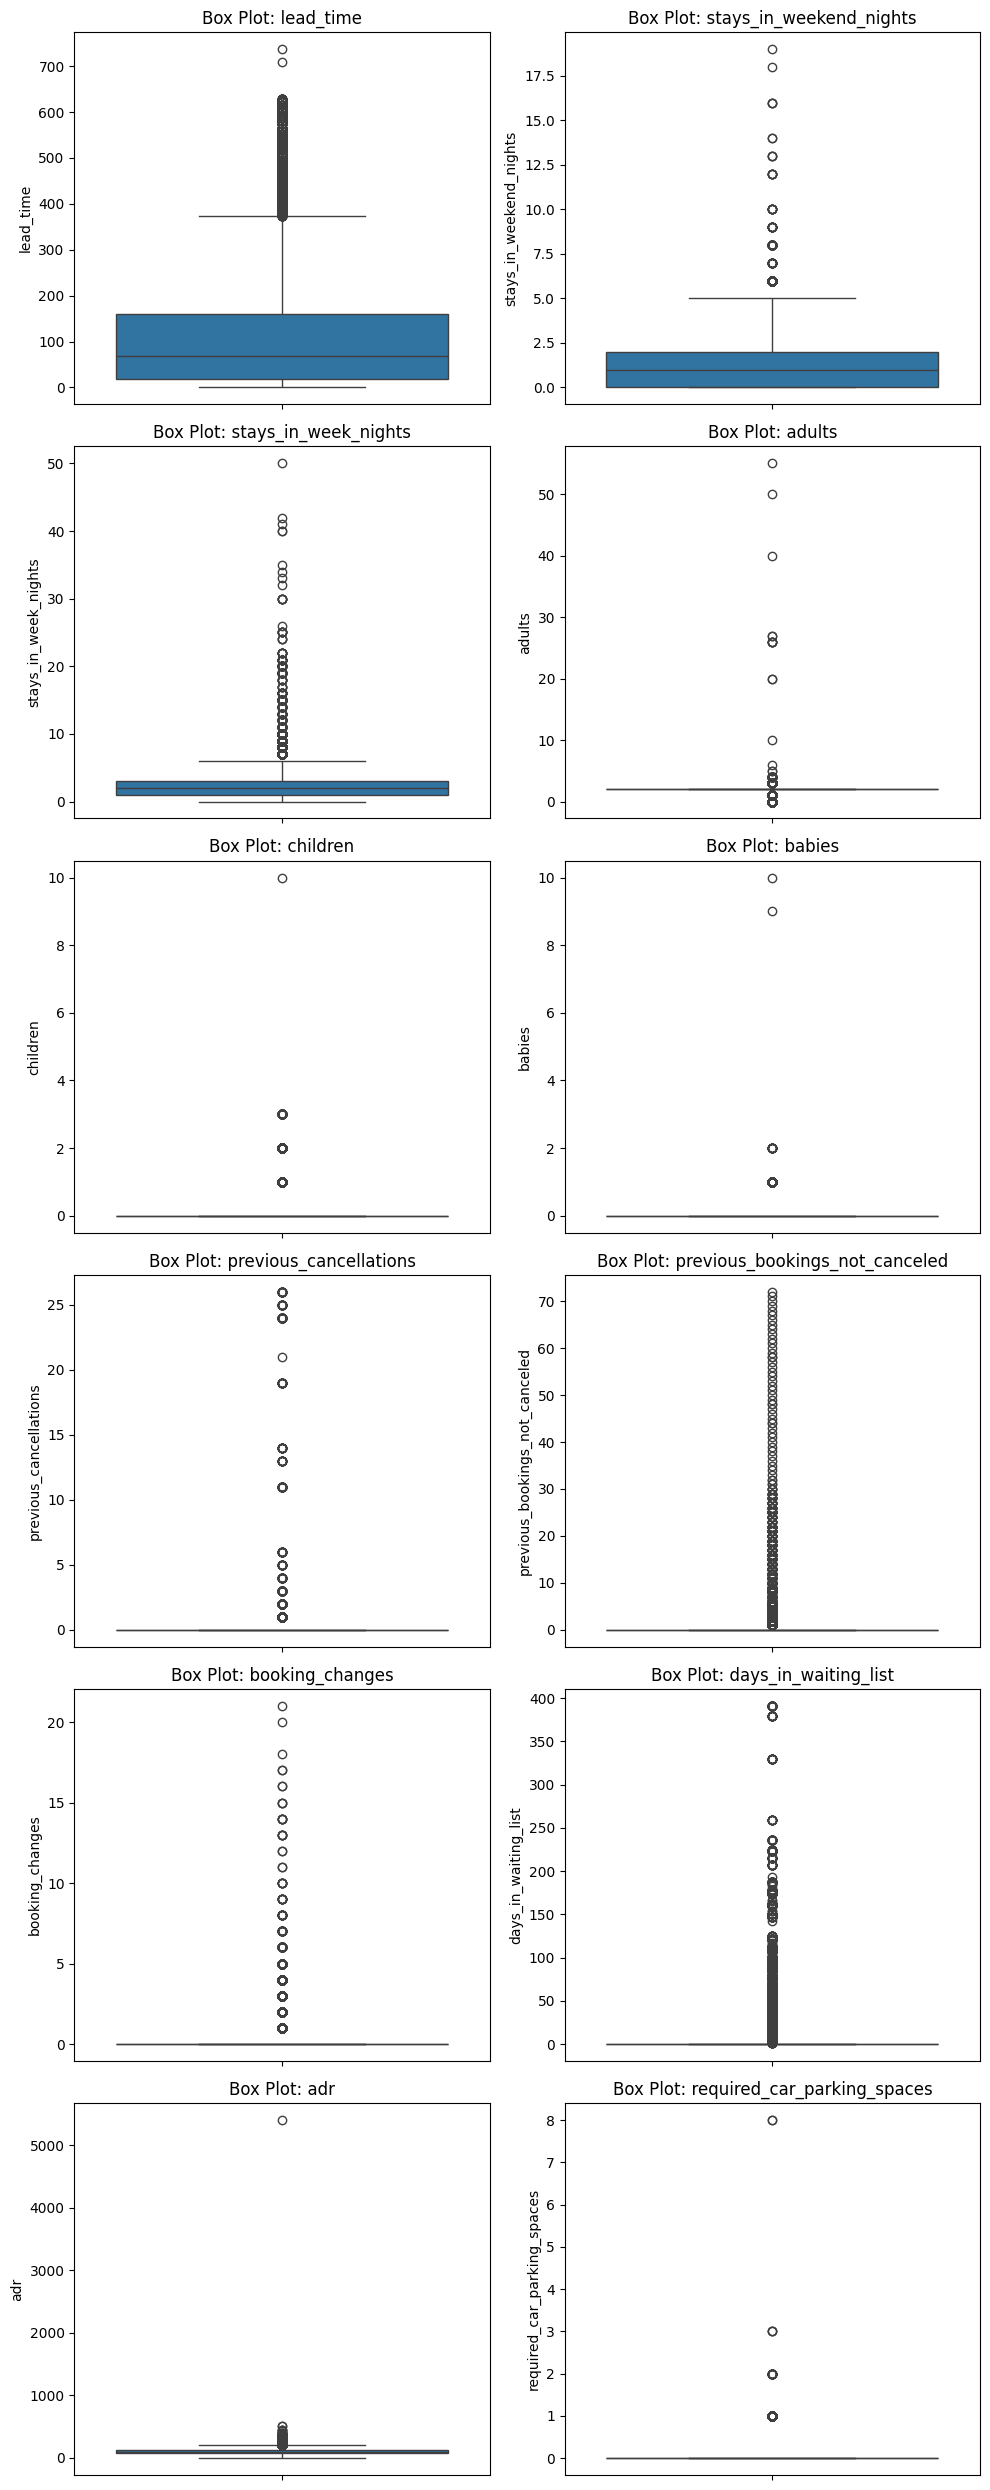

In [25]:
# Define the columns of interest for outlier detection
outlier_cols = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces']

# Create a function to detect outliers using the IQR method
def detect_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()
    return outliers

# Detect outliers in the specified columns
outliers_detected = detect_outliers_iqr(df, outlier_cols)
# Create a DataFrame to display the outlier results in a table format
outlier_df = pd.DataFrame(list(outliers_detected.items()), columns=['Columna', 'Datos Atípicos'])
print(outlier_df)

# Columns for box plot
col_boxPlot = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces']

# Create subplots - 2 rows, 5 columns for example (5 plots per row)
fig, axes = plt.subplots(6, 2, figsize=(10, 25))  # Adjust the layout as needed
axes = axes.flatten()  # Flatten the axes array to iterate over easily

# Create individual box plots for each column
for i, col in enumerate(col_boxPlot):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot: {col}')

# Adjust layout
plt.tight_layout()
plt.show()

### Codificación de Variables Categóricas:

country

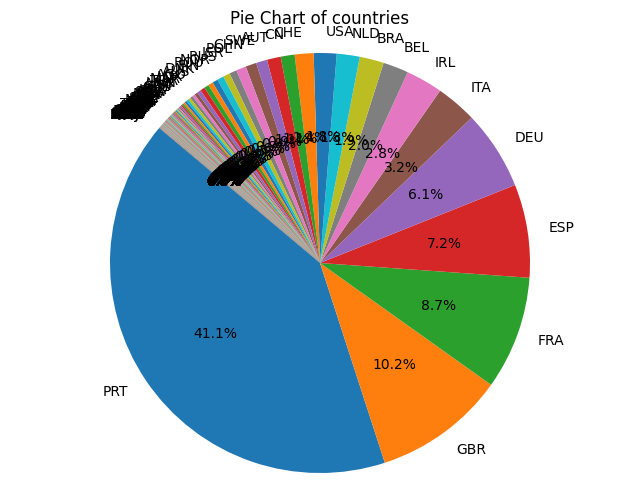

In [26]:
# Pie chart for countries
# Count occurrences of each category
country_counts = df['country'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

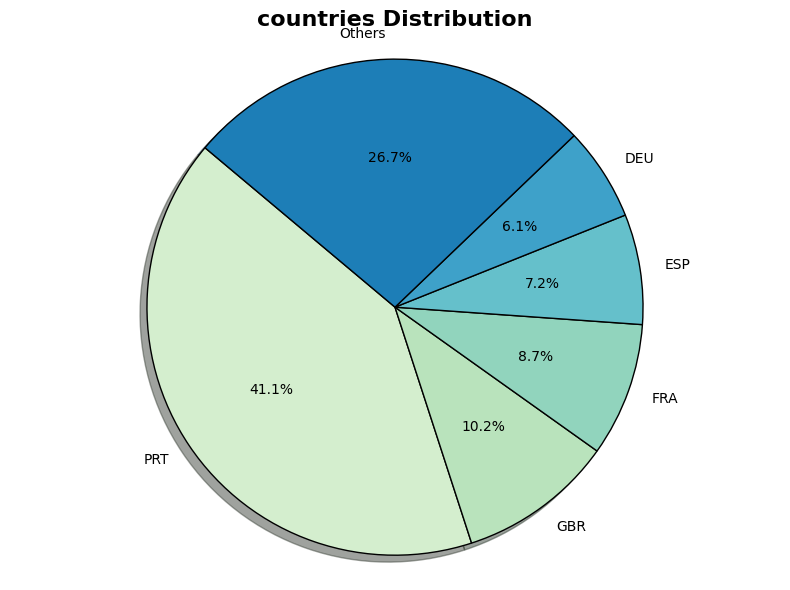

In [27]:
create_custom_pie_chart(df, column='country', threshold=5, colormap='GnBu', title='countries Distribution')


In [28]:
# Paso 1: Crear una nueva columna
df['Country_Group'] = df['country']

# Calculate total occurrences
counts = df["country"].value_counts()
total = counts.sum()

# Calculate percentage for each country
percentages = (counts / total) * 100
# Paso 2: Identificar los países a agrupar como "Others"
small_countries = percentages[percentages < 5].index

# Paso 3: Actualizar los valores en la columna "Country_Group"
df.loc[df['country'].isin(small_countries), 'Country_Group'] = 'Others'

# Paso 4: Verificar el DataFrame actualizado
print(df[['country', 'Country_Group']].head(16))  # Muestra los primeros registros


   country Country_Group
0      PRT           PRT
1      PRT           PRT
2      GBR           GBR
3      GBR           GBR
4      GBR           GBR
5      GBR           GBR
6      PRT           PRT
7      PRT           PRT
8      PRT           PRT
9      PRT           PRT
10     PRT           PRT
11     PRT           PRT
12     USA        Others
13     ESP           ESP
14     PRT           PRT
15     IRL        Others


In [29]:
df['Country_Group'].unique()

array(['PRT', 'GBR', 'Others', 'ESP', 'FRA', 'DEU'], dtype=object)

In [30]:
df['Country_Group'].describe()

count     119390
unique         6
top          PRT
freq       49078
Name: Country_Group, dtype: object

agent

In [31]:
# Paso 1: Crear una nueva columna
df['agent_Group'] = df['agent']

# Calculate total occurrences
counts = df["agent"].value_counts()
total = counts.sum()

# Calculate percentage for each country
percentages = (counts / total) * 100
# Paso 2: Identificar los países a agrupar como "Others"
small_countries = percentages[percentages < 3].index

# Paso 3: Actualizar los valores en la columna "Country_Group"
df.loc[df['agent'].isin(small_countries), 'agent_Group'] = 'Others'

# Paso 4: Verificar el DataFrame actualizado
print(df[['agent', 'agent_Group']].head(16))  # Muestra los primeros registros

    agent agent_Group
0     9.0         9.0
1     9.0         9.0
2     9.0         9.0
3   304.0      Others
4   240.0       240.0
5   240.0       240.0
6     9.0         9.0
7   303.0      Others
8   240.0       240.0
9    15.0      Others
10  240.0       240.0
11  240.0       240.0
12  240.0       240.0
13  241.0      Others
14  241.0      Others
15  240.0       240.0


In [32]:
df['agent_Group'].describe()

count     119390.0
unique         5.0
top            9.0
freq       48301.0
Name: agent_Group, dtype: float64

one hot

In [33]:
# List of columns to one-hot encode 
# (Dejamos country afuera )
col_encode_oneHot = ['hotel', 'meal','market_segment','distribution_channel','deposit_type','customer_type','reservation_status','Country_Group','agent_Group']
df_oneHot_encoded = pd.get_dummies(df, columns=col_encode_oneHot, dtype=int)


# Ordinal encode
# (Dejamos reserved_room_type, assigned_room_type afuera mientras miramos si se pueden fusionar)
# for arrival_date_month
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 
    'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 
    'November': 11, 'December': 12
}
df_oneHot_encoded['arrival_date_month'] = df_oneHot_encoded['arrival_date_month'].map(month_mapping)
df_encoded = df_oneHot_encoded
df_encoded.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,Country_Group_ESP,Country_Group_FRA,Country_Group_GBR,Country_Group_Others,Country_Group_PRT,agent_Group_1.0,agent_Group_9.0,agent_Group_14.0,agent_Group_240.0,agent_Group_Others
0,0,342,2015,7,27,1,0,0,2,0.0,...,0,0,0,0,1,0,1,0,0,0
1,0,737,2015,7,27,1,0,0,2,0.0,...,0,0,0,0,1,0,1,0,0,0
2,0,7,2015,7,27,1,0,1,1,0.0,...,0,0,1,0,0,0,1,0,0,0
3,0,13,2015,7,27,1,0,1,1,0.0,...,0,0,1,0,0,0,0,0,0,1
4,0,14,2015,7,27,1,0,2,2,0.0,...,0,0,1,0,0,0,0,0,1,0


room types

In [34]:
# Step 1: Compare the two columns
diff_values = df['reserved_room_type'] != df['assigned_room_type']

# Step 2: Get rows where the values are different
equal_rows = df[diff_values]

# Step 3: Show the result
len(equal_rows)


14917

In [35]:
df_encoded['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [36]:
df_encoded['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

label encoding

In [37]:

def ordered_label_encode(df, column, order):
    # Create a mapping dictionary based on the specified order
    mapping = {category: idx for idx, category in enumerate(order)}
    
    # Replace the original column values with the mapped integers
    df[column] = df[column].map(mapping)
    
    return df, mapping


desired_order = ['A', 'B', 'C','D','E','F','G','H','I','K','L','P']

# Apply ordered label encoding
df_encoded, mapping = ordered_label_encode(df_encoded, 'assigned_room_type', desired_order)
df_encoded, mapping = ordered_label_encode(df_encoded, 'reserved_room_type', desired_order)




print("Mapping:", mapping)


Mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'P': 11}


### Normalización de Rango:

In [38]:
from sklearn.preprocessing import MinMaxScaler

# Columns you want to normalize
columns_to_normalize = ['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes','days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests','assigned_room_type','reserved_room_type'
        ]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Create a new DataFrame to hold the normalized values
normalized_df = df_encoded.copy()
normalized_df[columns_to_normalize] = scaler.fit_transform(normalized_df[columns_to_normalize])

# Display the new DataFrame
print(normalized_df)

        is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0                 0   0.464043               2015                   7   
1                 0   1.000000               2015                   7   
2                 0   0.009498               2015                   7   
3                 0   0.017639               2015                   7   
4                 0   0.018996               2015                   7   
...             ...        ...                ...                 ...   
119385            0   0.031208               2017                   8   
119386            0   0.138399               2017                   8   
119387            0   0.046133               2017                   8   
119388            0   0.147897               2017                   8   
119389            0   0.278155               2017                   8   

        arrival_date_week_number  arrival_date_day_of_month  \
0                             27                          1 

## Procesamiento de Datos:

### Covarianza:

In [39]:
# Mientras preguntamos por esos datos
df_temporal = normalized_df.drop(columns=['country','reservation_status_date','agent'])
cov_matrix = df_temporal.cov()
print(cov_matrix)

                          is_canceled  lead_time  arrival_date_year  \
is_canceled                  0.233210   0.020525           0.005692   
lead_time                    0.020525   0.021024           0.004118   
arrival_date_year            0.005692   0.004118           0.500522   
arrival_date_month           0.016450   0.058895          -1.153921   
arrival_date_week_number     0.053534   0.250279          -5.203069   
...                               ...        ...                ...   
agent_Group_1.0              0.021914   0.011435          -0.041903   
agent_Group_9.0             -0.005004  -0.015553           0.049923   
agent_Group_14.0            -0.005832  -0.001421           0.006049   
agent_Group_240.0            0.002739  -0.003055           0.001176   
agent_Group_Others          -0.013817   0.008594          -0.015245   

                          arrival_date_month  arrival_date_week_number  \
is_canceled                         0.016450                  0.053534   

### Correlación:

In [40]:
# Esperando lo mismo que covarianza
correlation_matrix = df_temporal.corr()
print(correlation_matrix)

                          is_canceled  lead_time  arrival_date_year  \
is_canceled                  1.000000   0.293123           0.016660   
lead_time                    0.293123   1.000000           0.040142   
arrival_date_year            0.016660   0.040142           1.000000   
arrival_date_month           0.011022   0.131424          -0.527739   
arrival_date_week_number     0.008148   0.126871          -0.540561   
...                               ...        ...                ...   
agent_Group_1.0              0.190736   0.331477          -0.248950   
agent_Group_9.0             -0.021114  -0.218545           0.143773   
agent_Group_14.0            -0.070246  -0.056991           0.049728   
agent_Group_240.0            0.017675  -0.065650           0.005181   
agent_Group_Others          -0.058712   0.121624          -0.044218   

                          arrival_date_month  arrival_date_week_number  \
is_canceled                         0.011022                  0.008148   

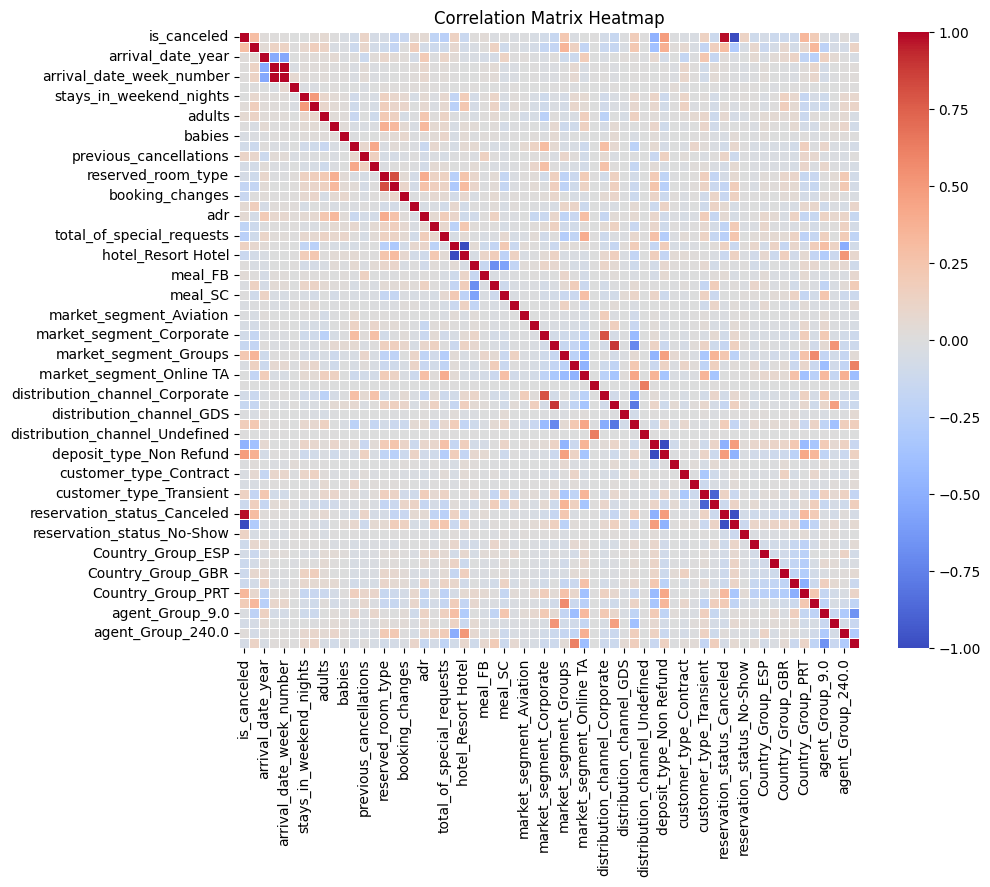

In [41]:
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

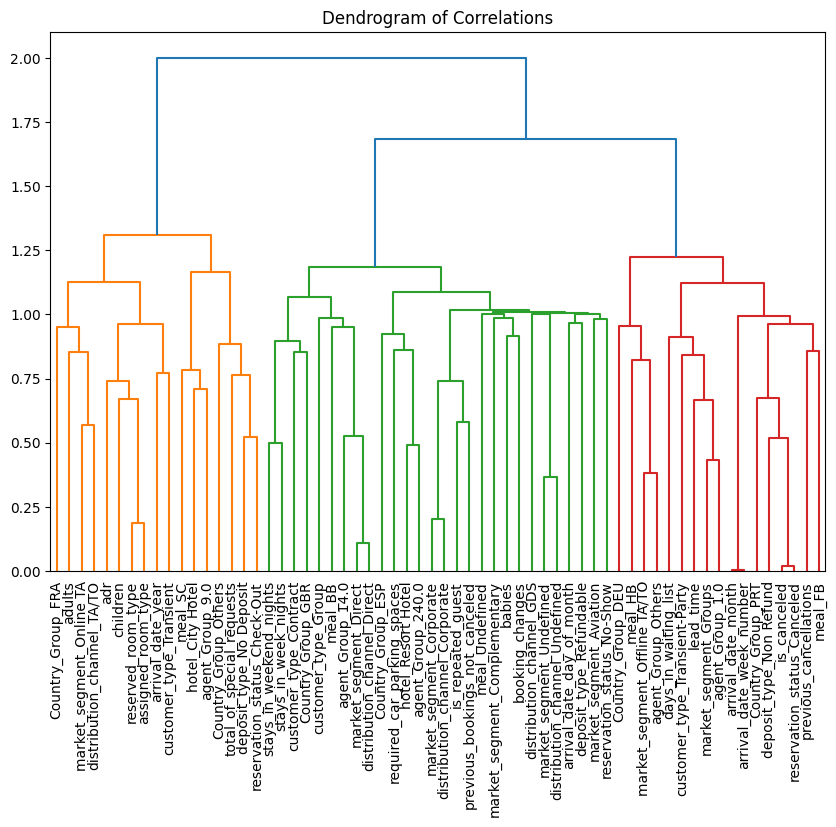

In [42]:
distance_matrix = 1 - correlation_matrix

# Perform hierarchical clustering using linkage
# Use 'complete' linkage method, but you can choose other methods like 'average' or 'single'
Z = linkage(squareform(distance_matrix), method='complete')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=correlation_matrix.columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Correlations')
plt.show()

In [43]:
# Assuming your DataFrame is 'df_encoded'

# Step 1: Find all non-numeric columns
non_numeric_columns = normalized_df.select_dtypes(exclude=['number']).columns

# Display the non-numeric columns
print("Non-numeric columns:")
print(non_numeric_columns)


Non-numeric columns:
Index(['country', 'agent', 'reservation_status_date'], dtype='object')


Analizar si afecta en satisfacción del cliente (repeated guest)

## PCA

inicialmente se realiza el pca solo con las columnas numericas (resultantes de la codificación)

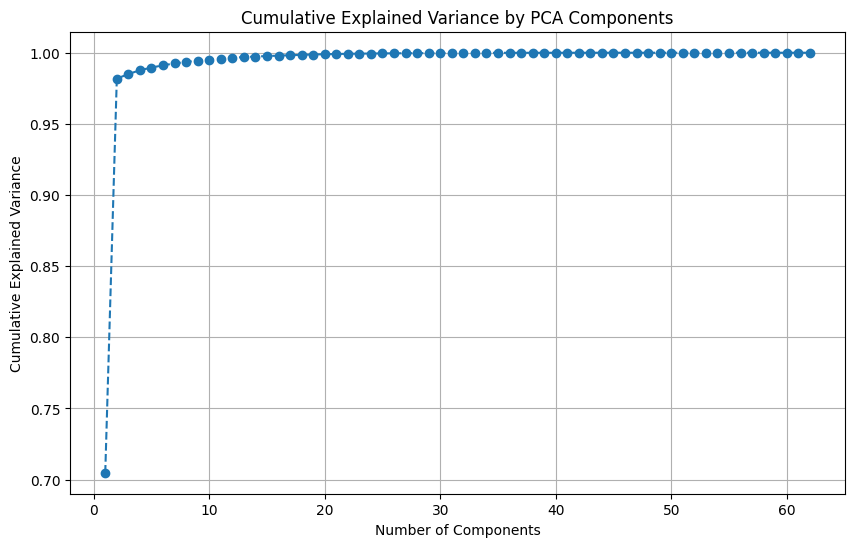

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Filter only numeric columns
normalized_df = normalized_df.select_dtypes(include=['number'])

# Step 2: Initialize PCA (you can define n_components or use the default which considers all components)
pca = PCA()

# Step 3: Fit PCA on the numeric columns and transform the data
pca_result = pca.fit_transform(normalized_df)


# Step 4: Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Step 5: Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()



In [45]:
# Step 3: Calculate the cumulative variance for the first 2 principal components
cumulative_variance_2_components = explained_variance[:2].sum()

# Step 4: Display the cumulative variance for the first 2 components
print(f"Cumulative explained variance for the first 2 principal components: {cumulative_variance_2_components:.4f}")

Cumulative explained variance for the first 2 principal components: 0.9818



Most important variables for Principal Component 1:
arrival_date_week_number        0.973139
arrival_date_month              0.219254
arrival_date_day_of_month       0.064450
arrival_date_year               0.027308
customer_type_Transient         0.002470
agent_Group_9.0                 0.002333
market_segment_Offline TA/TO    0.001957
agent_Group_1.0                 0.001559
market_segment_Online TA        0.001444
lead_time                       0.001315
Name: PC1, dtype: float64

Most important variables for Principal Component 2:
arrival_date_day_of_month       0.997406
arrival_date_week_number        0.055716
arrival_date_month              0.045313
arrival_date_year               0.004475
market_segment_Offline TA/TO    0.000830
reservation_status_Canceled     0.000576
Country_Group_FRA               0.000555
distribution_channel_Direct     0.000518
market_segment_Groups           0.000486
Country_Group_Others            0.000481
Name: PC2, dtype: float64

Explained variance ra

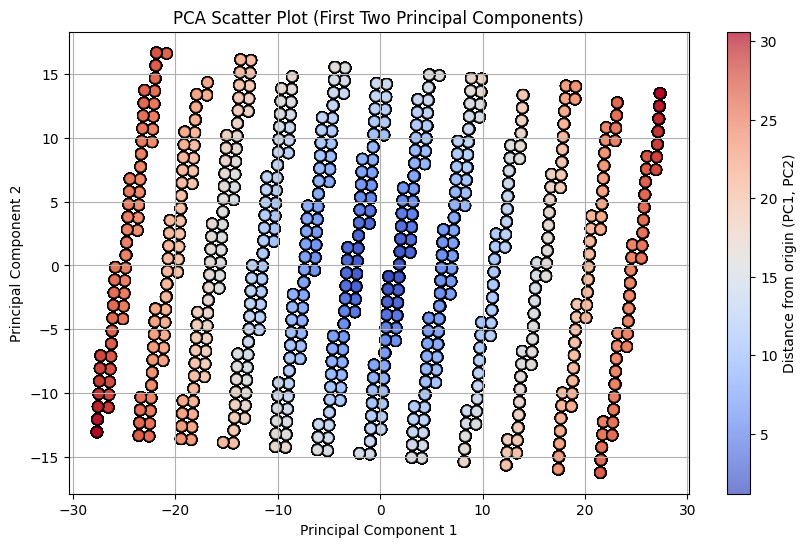

In [46]:

# Step 1: Filter only numeric columns
normalized_df = normalized_df.select_dtypes(include=['number'])

# Step 2: Initialize PCA with two components for 2D visualization
pca = PCA(n_components=2)

# Step 3: Fit PCA on the numeric columns and transform the data
pca_result = pca.fit_transform(normalized_df)

loadings = pca.components_.T  # Transpose to get variables in rows

loadings_df = pd.DataFrame(loadings, index=normalized_df.columns, columns=['PC1', 'PC2'])

# Step 5: Analyze the loadings for PC1 and PC2
for i in range(2):
    print(f"\nMost important variables for Principal Component {i+1}:")
    # Sort loadings by absolute value to find the most important variables
    sorted_loadings = loadings_df.iloc[:, i].abs().sort_values(ascending=False)
    print(sorted_loadings.head(10))  # Display top 10 variables

# Step 6: Explained variance ratio
print("\nExplained variance ratio for PC1 and PC2:")
print(pca.explained_variance_ratio_)

# Step 4: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Step 5: Normalize the PCA components for better color scaling
norm = np.sqrt(pca_df['PC1']**2 + pca_df['PC2']**2)

# Step 6: Plot the PCA result for the first two principal components with enhanced colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=norm, cmap='coolwarm', s=60, edgecolor='k', alpha=0.7)
plt.title('PCA Scatter Plot (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Add a color bar for reference
cbar = plt.colorbar(scatter)
cbar.set_label('Distance from origin (PC1, PC2)')

plt.show()


Los primeros dos componentes principales explican en el 87% de la varianza

# Clustering

Las métricas usadas para validar los clusters son:
- Silhouette Score
- Davies-Bouldin Score
- 

In [47]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [53]:
columnas = ["Algoritmo", "Parametros", "Silhouette Score", "Davies-Bouldin Index", "Numero de clusters"]
resultados = pd.DataFrame(columns=columnas)

## K-means

In [59]:
from sklearn.cluster import KMeans

k_values = [2,3,4,5]

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42)
    clusters = kmeans.fit_predict(normalized_df)

    #Métricas
    silhouette_avg = silhouette_score(normalized_df, clusters)
    db_index = davies_bouldin_score(normalized_df, clusters)

    #Resultados
    new_row = pd.DataFrame({
        "Algoritmo": ["KMeans"],
        "Parametros": [f"k={k}"],
        "Silhouette Score": [silhouette_avg],
        "Davies-Bouldin Index": [db_index],
        "Numero de clusters": k
    })
    
    resultados = pd.concat([resultados, new_row], ignore_index=True)

C:\Users\mey\AppData\Local\Temp\ipykernel_15880\2219063408.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, new_row], ignore_index=True)


## DBSCAN 
Para obtener el valor óptimo de *ε* que permita tener la mejor partición del conjunto de datos se usara la gráfica de codo, esta gráfica calcula las distancias de cada punto a su vecino más cercano y traza una gráfica de la distancia del punto al vecimo k-ésimo más cercano. 

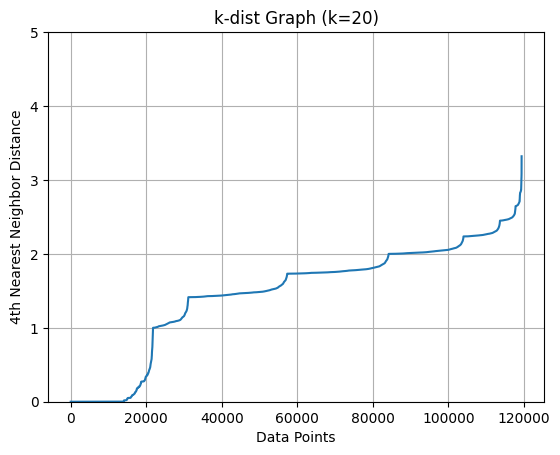

In [58]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(normalized_df)
distances, indices = neighbors_fit.kneighbors(normalized_df)

distances = np.sort(distances[:, 19], axis=0)
plt.plot(distances)
plt.title('k-dist Graph (k=20)')
plt.xlabel('Data Points')
plt.ylabel('4th Nearest Neighbor Distance')
plt.ylim(0,5)
plt.grid(True)
plt.show()

El valor de eps corresponde al punto en el que la curva tiene un cambio más drástico, el cuál está indicado por el codo. Esta curvatura indica que la mayoría de los puntos tienen una distancia al 20th vecino más cercano de entre 0 y 2, a partir de un punto cercano a los 100000 datos la distancia empieza a subir rápidamente.

A partir de la gráfica se determina que un buen valor para eps esta entre $2$ y $3$.

En cuanto a los min_points se uso la regla empírica min_points = 2 * n, donde n es la cantidad de dimensiones

In [61]:
from sklearn.cluster import DBSCAN

eps_values= [2, 2.5, 3]
min_points = 64

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_points)
    clusters = dbscan.fit_predict(normalized_df)

    # Clusters sin noise points
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    
    if num_clusters > 1: 
        silhouette_avg = silhouette_score(normalized_df, clusters)
        db_index = davies_bouldin_score(normalized_df, clusters)
        new_row = pd.DataFrame({
        "Algoritmo": ["DBSCAN"],
        "Parametros": [f"eps={eps},min_points={min_points}"],
        "Silhouette Score": [silhouette_avg],
        "Davies-Bouldin Index": [db_index],
        "Numero de clusters": num_clusters
        })
    
        resultados = pd.concat([resultados, new_row], ignore_index=True)
    else: 
        print(f"Para eps={eps} y min_points={min_points}, no es posible calcular Silhouette o Davies-Bouldin (clusters insuficientes).")

In [62]:
resultados

,Algoritmo,Parametros,Silhouette Score,Davies-Bouldin Index,Numero de clusters
0,KMeans,k=2,0.418640,0.923313,2
1,KMeans,k=3,0.320704,1.042878,3
2,KMeans,k=4,0.338393,0.894627,4
3,KMeans,k=5,0.335936,0.919727,5
4,DBSCAN,"eps=2,min_points=64",-0.502530,1.839057,179
5,DBSCAN,"eps=2.5,min_points=64",-0.048555,4.835766,14
6,DBSCAN,"eps=3,min_points=64",-0.022569,3.340714,13
